# ***Inicio***

Se elige un dataset pequeño pero con datos de relevancia para analizar el fraude en tarjeta de crédito en pos de considerar puntos de riesgo y posibilidades de prevención.

El análisis puede ir enfocado a cualquier equipo de prevención de fraudes.

Los campos existentes son: **texto en negrita**

**Entered_Date:** Fecha en la que se ingresó la información o se registró la transacción.

**Submission_Status:** Estado de la presentación de la transacción (por ejemplo, aceptada, rechazada).

**Fraud_Type:** Tipo de fraude asociado a la transacción, indicando la naturaleza del fraude detectado.

**UBICACION**: Localización geográfica relacionada con la transacción, que puede incluir si fue local o internacional.

**Transaction_Amount_USD:** Monto de la transacción en dólares estadounidenses.

**ano:** Año en que se realizó la transacción, almacenado como un entero.

**mes:** Mes en que se realizó la transacción, también almacenado como un entero.

**Local_Amount:** Monto de la transacción en la moneda local, almacenado como un entero.

**Merchant_Name:** Nombre del comercio donde se realizó la transacción.

**Acquirer_Reference_Number:** Número de referencia asignado por el adquirente, utilizado para rastrear la transacción.

**Transaction_Type:** Tipo de transacción.

**Local_Currency_Code:** Código de la moneda local utilizada en la transacción, almacenado como un entero.

**Directory_Server_ID:** Identificador del servidor de directorio; este campo tiene pocos datos.

**Program_Protocol:** Protocolo utilizado para la transacción, aunque también tiene pocos datos disponibles.

**Transaction_Type_Indicator:** Indicador que describe el tipo de transacción de manera más detallada; este campo tiene muy pocos datos.

**string_field_24:** Campo adicional sin datos válidos, probablemente destinado a una información específica no utilizada.

In [54]:
from google.colab import files, auth
import pandas as pd
import numpy as np
import pandas.io.sql as psql
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import psycopg2
from psycopg2 import Error




url = 'https://raw.githubusercontent.com/Razziel10/DS2_Coria_Juan_Pablo/refs/heads/main/TCV1.csv'





In [55]:
df = pd.read_csv(url, delimiter=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entered_Date                496 non-null    object 
 1   Submission_Status           496 non-null    object 
 2   Fraud_Type                  496 non-null    object 
 3   UBICACION                   496 non-null    object 
 4   Transaction_Amount_USD      496 non-null    object 
 5   ano                         496 non-null    int64  
 6   mes                         496 non-null    int64  
 7   Local_Amount                496 non-null    int64  
 8   Merchant_Name               496 non-null    object 
 9   Acquirer_Reference_Number   496 non-null    object 
 10  Transaction_Type            0 non-null      float64
 11  Local_Currency_Code         496 non-null    int64  
 12  Directory_Server_ID         28 non-null     object 
 13  Program_Protocol            35 non-

In [56]:
df.sample(20)

,Entered_Date,Submission_Status,Fraud_Type,UBICACION,Transaction_Amount_USD,ano,mes,Local_Amount,Merchant_Name,Acquirer_Reference_Number,Transaction_Type,Local_Currency_Code,Directory_Server_ID,Program_Protocol,Transaction_Type_Indicator,string_field_24
295,2024-03-27 13:39:49.000000 UTC,Success,CNP,INTER,"4,69",2024,202402,390000,MOBEFIND #3TQWF,82.644.314.043.000.000.000.000,NaN,32,NaN,NaN,NaN,NaN
26,2023-06-29 02:50:07.000000 UTC,Success,CNP,INTER,5,2023,202305,500,DELITEDANGERS.NET,95.209.143.140.000.000.000.000,NaN,840,NaN,3.0,NaN,NaN
376,2024-03-18 14:25:22.000000 UTC,Success,ROBO,INTER,"47,67",2024,202401,3918500,SUPERMERCADO LIII,52.308.454.024.866.300.000.000,NaN,32,NaN,NaN,NaN,NaN
260,2023-09-16 02:40:24.000000 UTC,Success,CNP,INTER,"107,44",2023,202309,3760000,MERPAGO*MERCADOLIBRE,12.709.173.250.012.300.000.000,NaN,32,NaN,1.0,11bbfc8e-fa0f-4828-afdf-10414c55e487,NaN
44,2023-04-26 04:52:12.000000 UTC,Success,CNP,INTER,"5,29",2023,202303,500,GLOWCOM,82.644.313.076.000.000.000.000,NaN,978,NaN,NaN,NaN,NaN
423,2024-08-05 13:30:32.000000 UTC,Success,CNP,INTER,"17,82",2024,202407,1782,BLOXFLIP.COM,82.716.214.209.900.000.000.000,NaN,840,ad6825c0-a1b7-4e2e-b69b-3827e81a48f2,2.0,NaN,NaN
2,2023-04-27 02:58:31.000000 UTC,Success,CNP,INTER,"39,99",2023,202302,3999,chdgmg.com,25.482.853.043.317.200.000.000,NaN,840,NaN,NaN,NaN,NaN
136,2023-12-21 02:47:09.000000 UTC,Success,CNP,LOCAL,"5,61",2023,202311,200000,MOV REC SALDO T/P-DCP,25.544.203.328.020.000.000.000,NaN,32,NaN,NaN,NaN,NaN
326,2024-06-13 14:44:54.000000 UTC,Success,CNP,LOCAL,"0,22",2024,202404,18800,FACEBK UC8BW2UXR2,15.265.674.100.000.200.000.000,NaN,32,NaN,NaN,NaN,NaN
206,2023-12-13 02:47:48.000000 UTC,Success,CNP,INTER,"5,71",2023,202310,200000,Personal Flow,52.308.453.304.622.600.000.000,NaN,32,NaN,NaN,NaN,NaN


# ***Porcentaje de nulos***

In [57]:
df.shape

(496, 16)

In [58]:
nulos = df.isnull().sum()
total = 496
porcentaje = (nulos/total)*100
print(f'{porcentaje}{df.isnull().sum()} ')

Entered_Date                    0.000000
Submission_Status               0.000000
Fraud_Type                      0.000000
UBICACION                       0.000000
Transaction_Amount_USD          0.000000
ano                             0.000000
mes                             0.000000
Local_Amount                    0.000000
Merchant_Name                   0.000000
Acquirer_Reference_Number       0.000000
Transaction_Type              100.000000
Local_Currency_Code             0.000000
Directory_Server_ID            94.354839
Program_Protocol               92.943548
Transaction_Type_Indicator     98.991935
string_field_24               100.000000
dtype: float64Entered_Date                    0
Submission_Status               0
Fraud_Type                      0
UBICACION                       0
Transaction_Amount_USD          0
ano                             0
mes                             0
Local_Amount                    0
Merchant_Name                   0
Acquirer_Reference_Numbe

# ***Limpieza***

In [59]:
df = pd.read_csv('TCV1.csv', sep=';', encoding='latin1')

#Cambio de nombres
rename_dict= {
    'Entered_Date': 'fecha',
    'Submission_Status' : 'estado_trx',
    'Fraud_Type' : 'tipo_fraude',
    'UBICACION' : 'ubicacion',
    'Transaction_Amount_USD' : 'monto_usd',
    'Local_Amount' : 'monto_arg',
    'Merchant_Name' : 'comercio',
    'Local_Currency_Code' : 'moneda'
}

#Renombrar
df.rename(columns=rename_dict, inplace=True)


#Dropeo por gran porcentaje de nulos
df =df.drop(['Transaction_Type', 'Directory_Server_ID', 'Program_Protocol', 'Transaction_Type_Indicator', 'string_field_24'], axis=1)





#cambio tipo
df['fecha'] = pd.to_datetime(df['fecha'])
df['monto_usd'] = df['monto_usd'].str.replace(',', '.').astype(float)
df['monto_arg'] = df['monto_arg'].astype(float)


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   fecha                      496 non-null    datetime64[ns, UTC]
 1   estado_trx                 496 non-null    object             
 2   tipo_fraude                496 non-null    object             
 3   ubicacion                  496 non-null    object             
 4   monto_usd                  496 non-null    float64            
 5   ano                        496 non-null    int64              
 6   mes                        496 non-null    int64              
 7   monto_arg                  496 non-null    float64            
 8   comercio                   496 non-null    object             
 9   Acquirer_Reference_Number  496 non-null    object             
 10  moneda                     496 non-null    int64              
dtypes: dat

# ***Preguntas e hipótesis correspondientes***

Pregunta 1: ¿Cuál es el tipo de fraude y ubicación más común?

Hipótesis: El robo del plástico, es el tipo de fraude menos común, siendo la operatoria sin tarjeta aquella más frecuente. A la par que la actividad local es la que presenta más fraude.


Pregunta 2: ¿Cuál es la tendencia de fraude a lo largo de estos últimos meses?

Hipótesis: El fraude aumentó el último tiempo por el aumento transaccional de los usuarios.

Pregunta 3: ¿Cuáles comercios destacan en términos de cantidad de transacciones y monto total transaccionado? ¿Existe correlación entre la cantidad de transacciones y el monto total por comerciante?

Hipótesis: Los comercios que tienen un mayor número de transacciones también tienden a tener un monto total transaccionado mayor, indicando que la actividad comercial y el valor de las transacciones están correlacionados.


# ***Gráficos y análisis***

# Pregunta 1

In [60]:
df.columns

Index(['fecha', 'estado_trx', 'tipo_fraude', 'ubicacion', 'monto_usd', 'ano',
       'mes', 'monto_arg', 'comercio', 'Acquirer_Reference_Number', 'moneda'],
      dtype='object')

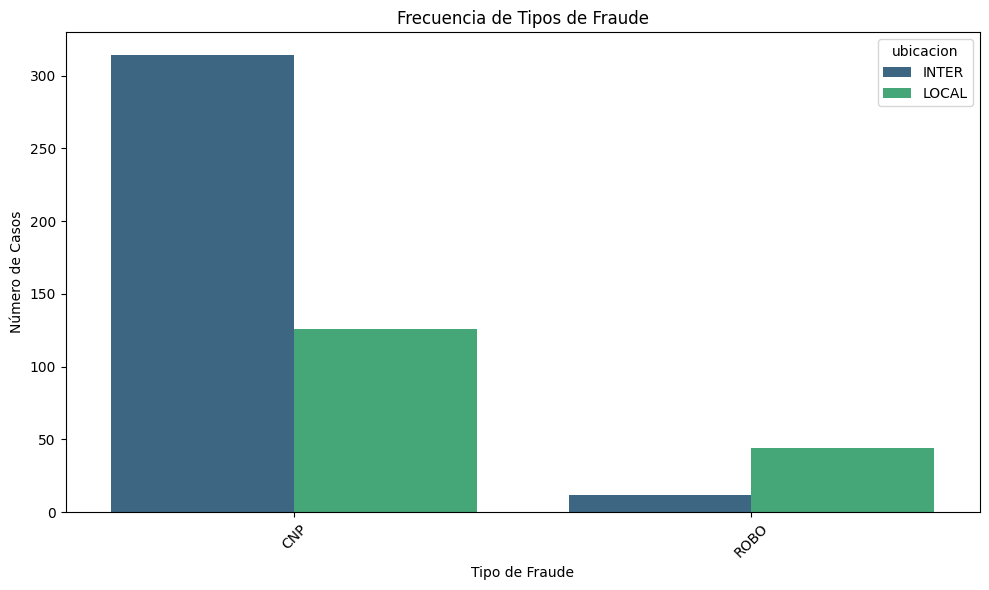

In [61]:
#¿Cuál es el tipo de fraude y ubicación más común?

fraud_counts = df.groupby(['tipo_fraude', 'ubicacion']).size().reset_index(name='frecuencia')

plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_counts, x='tipo_fraude', y='frecuencia', hue='ubicacion', palette='viridis')
plt.title('Frecuencia de Tipos de Fraude')
plt.xlabel('Tipo de Fraude')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.tight_layout()




plt.savefig('grafico_barra_q.png', dpi=300, bbox_inches='tight')



plt.show()

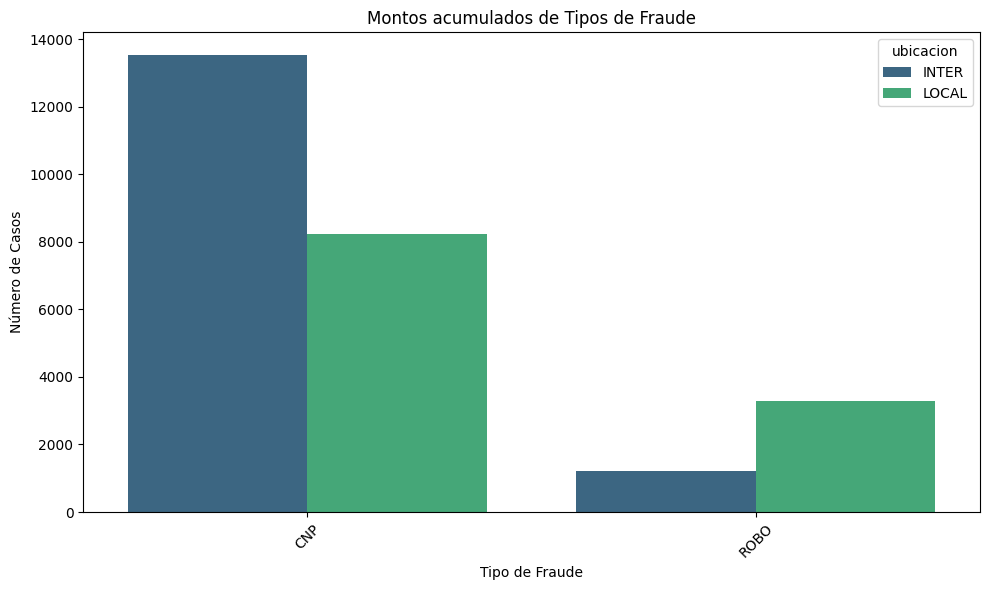

In [62]:
#¿Cuál es el tipo de fraude y ubicación más común? Esta vez, según el monto


fraud_amount = df.groupby(['tipo_fraude', 'ubicacion']).agg(
    monto_total=('monto_usd', 'sum')
).reset_index()



plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_amount, x='tipo_fraude', y= 'monto_total', hue='ubicacion', palette='viridis')
plt.title('Montos acumulados de Tipos de Fraude')
plt.xlabel('Tipo de Fraude')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.tight_layout()


plt.savefig('grafico_barra_monto.png', dpi=300, bbox_inches='tight')



plt.show()

Se observa que, efectivamente, el fraude sin plástico es aquel más frecuente, sin embargo, con respecto a la actividad mencionada, se visualiza una mayor cantidad de fraude internacional que local; esto puede explicarse por la sencillez al momento de operar sin la tarjeta fisica; observamos lo mismo con respecto a los montos.

# Pregunta 2

In [63]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   fecha                      496 non-null    datetime64[ns, UTC]
 1   estado_trx                 496 non-null    object             
 2   tipo_fraude                496 non-null    object             
 3   ubicacion                  496 non-null    object             
 4   monto_usd                  496 non-null    float64            
 5   ano                        496 non-null    int64              
 6   mes                        496 non-null    int64              
 7   monto_arg                  496 non-null    float64            
 8   comercio                   496 non-null    object             
 9   Acquirer_Reference_Number  496 non-null    object             
 10  moneda                     496 non-null    int64              
dtypes: dat

<ipython-input-64-b4f13d44b33c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['mes'] = df_2024['fecha'].dt.month


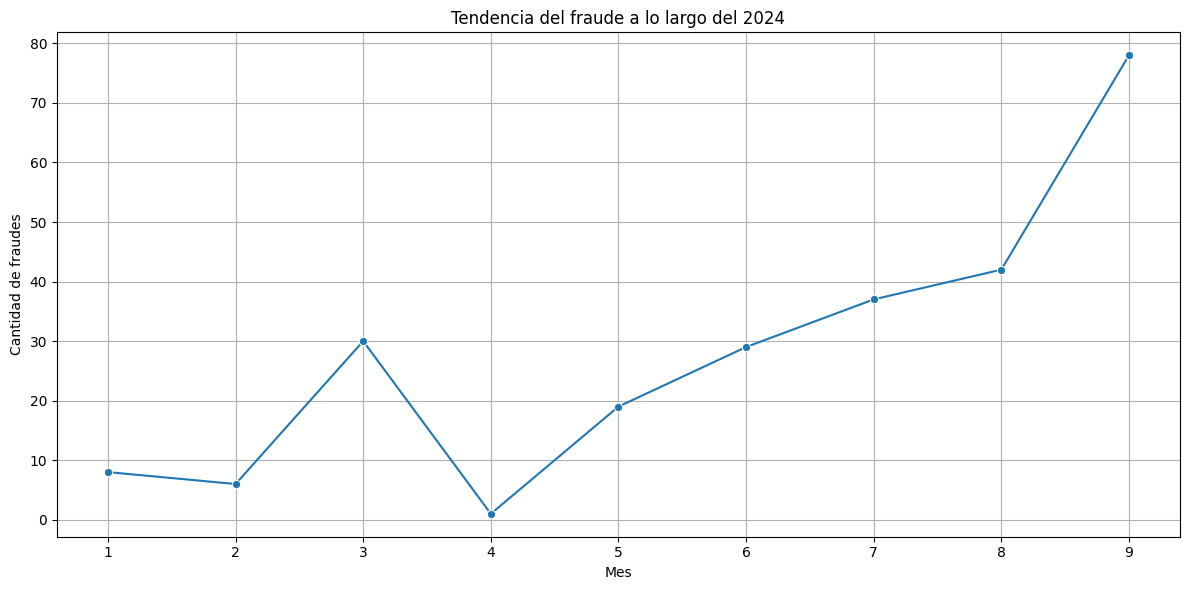

<ipython-input-64-b4f13d44b33c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['mes'] = df_2023['fecha'].dt.month


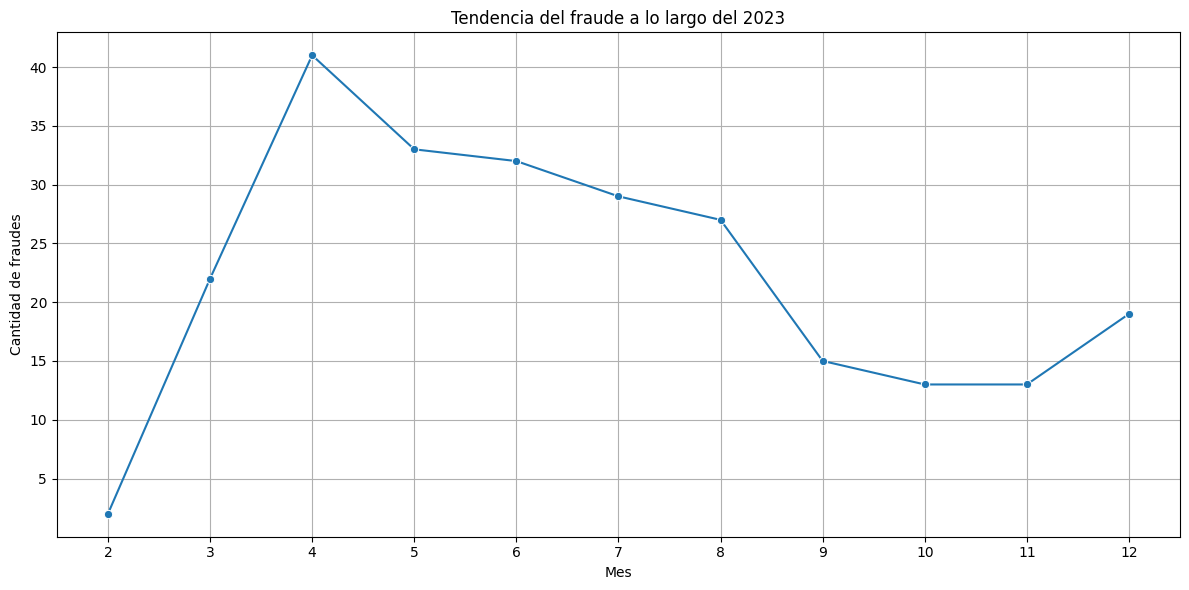

In [64]:
#¿Cuál es la tendencia de fraude a lo largo de estos últimos meses?

df_2024 = df[df['fecha'].dt.year == 2024]
df_2024['mes'] = df_2024['fecha'].dt.month
group_year = df_2024.groupby('mes').size().reset_index(name='cantidad_fraudes')


plt.figure(figsize=(12, 6))
sns.lineplot(data=group_year, x='mes', y='cantidad_fraudes', marker='o')
plt.title('Tendencia del fraude a lo largo del 2024')
plt.xlabel('Mes')
plt.ylabel('Cantidad de fraudes')
plt.xticks(group_year['mes'])
plt.grid(True)
plt.tight_layout()


plt.savefig('grafico_linea_24.png', dpi=300, bbox_inches='tight')
plt.show()



#Se observa como fue el 2023 para contrastar

df_2023 = df[df['fecha'].dt.year == 2023]
df_2023['mes'] = df_2023['fecha'].dt.month
group_year = df_2023.groupby('mes').size().reset_index(name='cantidad_fraudes')


plt.figure(figsize=(12, 6))
sns.lineplot(data=group_year, x='mes', y='cantidad_fraudes', marker='o')
plt.title('Tendencia del fraude a lo largo del 2023')
plt.xlabel('Mes')
plt.ylabel('Cantidad de fraudes')
plt.xticks(group_year['mes'])
plt.grid(True)
plt.tight_layout()


plt.savefig('grafico_linea_23.png', dpi=300, bbox_inches='tight')
plt.show()


Se observa un aumento del fraude los últimos meses. Esto puede deberse al aumento de usuarios y uso de la tarjeta. Se agrega un análisis del 2023 para contrastar y se visualiza un gran pico al comienzo del año, el cual comienza a menguar con el pasar de los meses. Esto puede deberse a una salida abrupta del producto sin las correctas medidas de seguridad.

In [65]:
#Pregunta 3: ¿Cuáles comercios destacan en términos de cantidad de transacciones y monto total transaccionado? ¿Existe correlación entre la cantidad de transacciones y el monto total por comerciante?

In [66]:
comercios_analisis = df.groupby('comercio').agg(
    cantidad_transacciones=('comercio', 'count'),
    monto_total=('monto_usd', 'sum')
).reset_index()


top_5_comercios_q = comercios_analisis.nlargest(5, 'cantidad_transacciones')

top_5_comercios_monto = comercios_analisis.nlargest(5, 'monto_total')

<ipython-input-67-9858f4dd7820>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_comercios_q, x='cantidad_transacciones', y='comercio', palette='viridis')
<ipython-input-67-9858f4dd7820>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_comercios_monto, x='monto_total', y='comercio', palette='viridis')


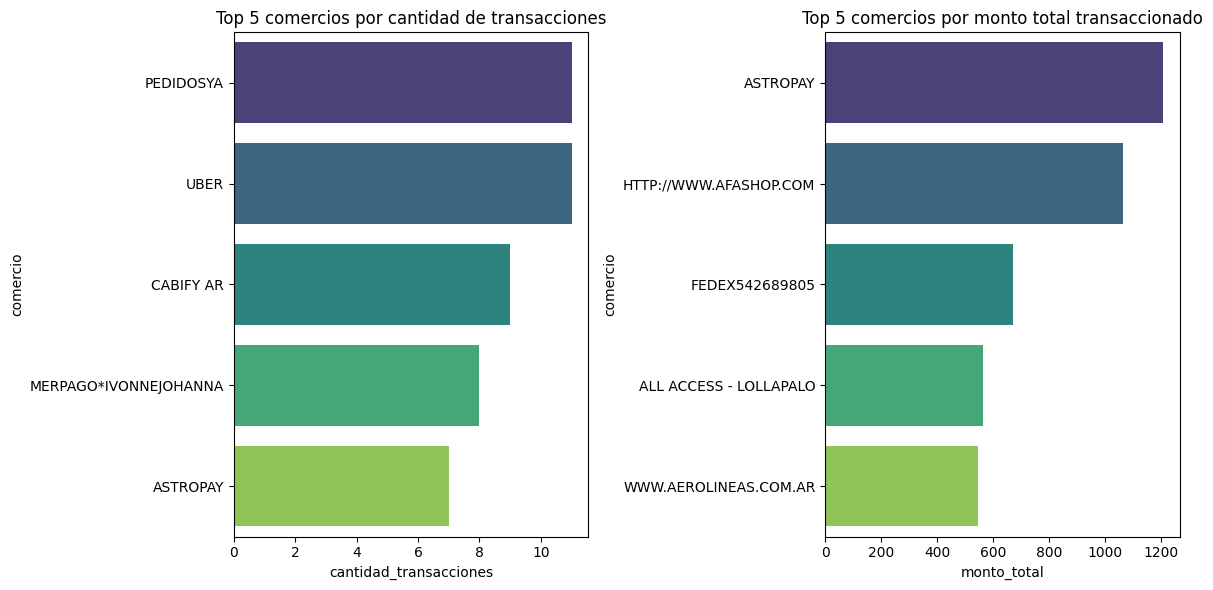

In [67]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(data=top_5_comercios_q, x='cantidad_transacciones', y='comercio', palette='viridis')
plt.title('Top 5 comercios por cantidad de transacciones')


plt.subplot(1, 2, 2)
sns.barplot(data=top_5_comercios_monto, x='monto_total', y='comercio', palette='viridis')
plt.title('Top 5 comercios por monto total transaccionado')

plt.tight_layout()


plt.savefig('graficos_sin_separacion.png', dpi=300, bbox_inches='tight')
plt.show()

In [68]:
correlacion = comercios_analisis['cantidad_transacciones'].corr(comercios_analisis['monto_total'])
print(f'Correlación entre cantidad de transacciones y monto total: {correlacion}')

Correlación entre cantidad de transacciones y monto total: 0.2416922770835072


No se observa una correlación fuerte entre la cantidad de transacciones y el monto total de las mismas.

In [69]:
df.columns

Index(['fecha', 'estado_trx', 'tipo_fraude', 'ubicacion', 'monto_usd', 'ano',
       'mes', 'monto_arg', 'comercio', 'Acquirer_Reference_Number', 'moneda'],
      dtype='object')

<ipython-input-70-de0401b6bb46>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_comercios_q, x='cantidad_transacciones', y='comercio', palette='viridis')
<ipython-input-70-de0401b6bb46>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_comercios_monto, x='monto_total', y='comercio', palette='viridis')


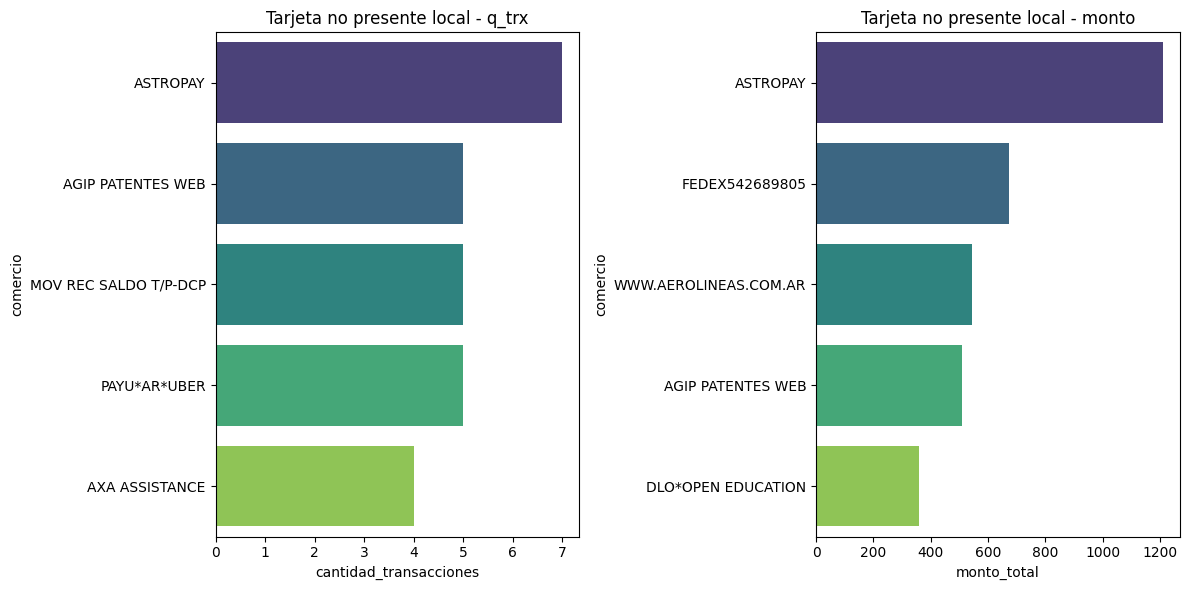

Correlación entre cantidad de transacciones y monto total: 0.4094437369662804


<ipython-input-70-de0401b6bb46>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_comercios_q, x='cantidad_transacciones', y='comercio', palette='viridis')
<ipython-input-70-de0401b6bb46>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_comercios_monto, x='monto_total', y='comercio', palette='viridis')


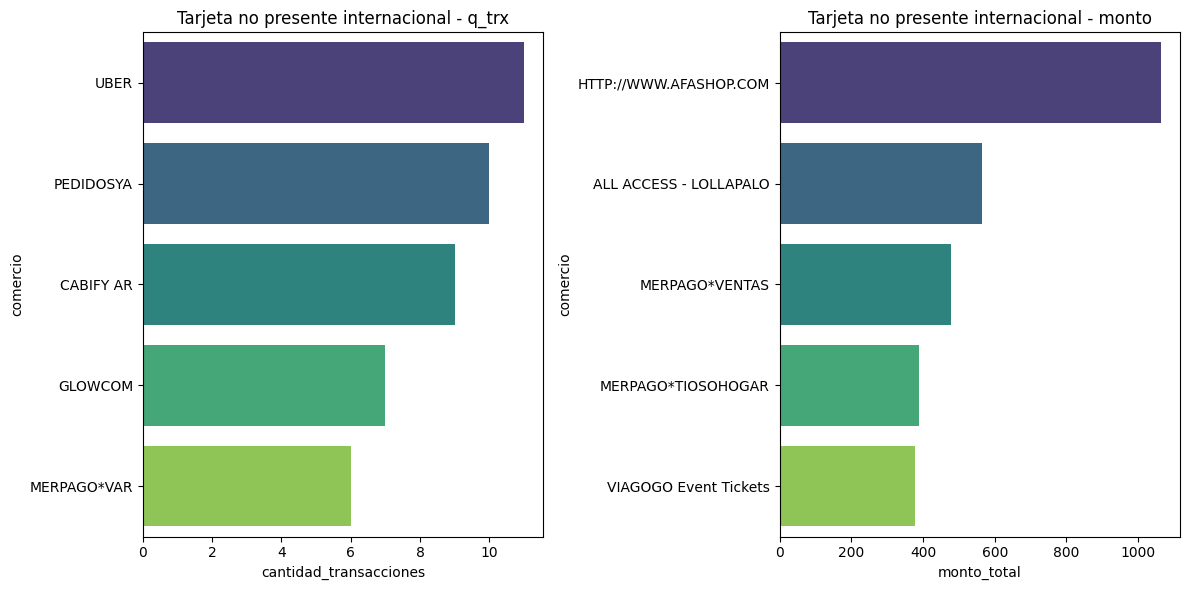

Correlación entre cantidad de transacciones y monto total: 0.1921237602518268


<ipython-input-70-de0401b6bb46>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_comercios_q, x='cantidad_transacciones', y='comercio', palette='viridis')
<ipython-input-70-de0401b6bb46>:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_comercios_monto, x='monto_total', y='comercio', palette='viridis')


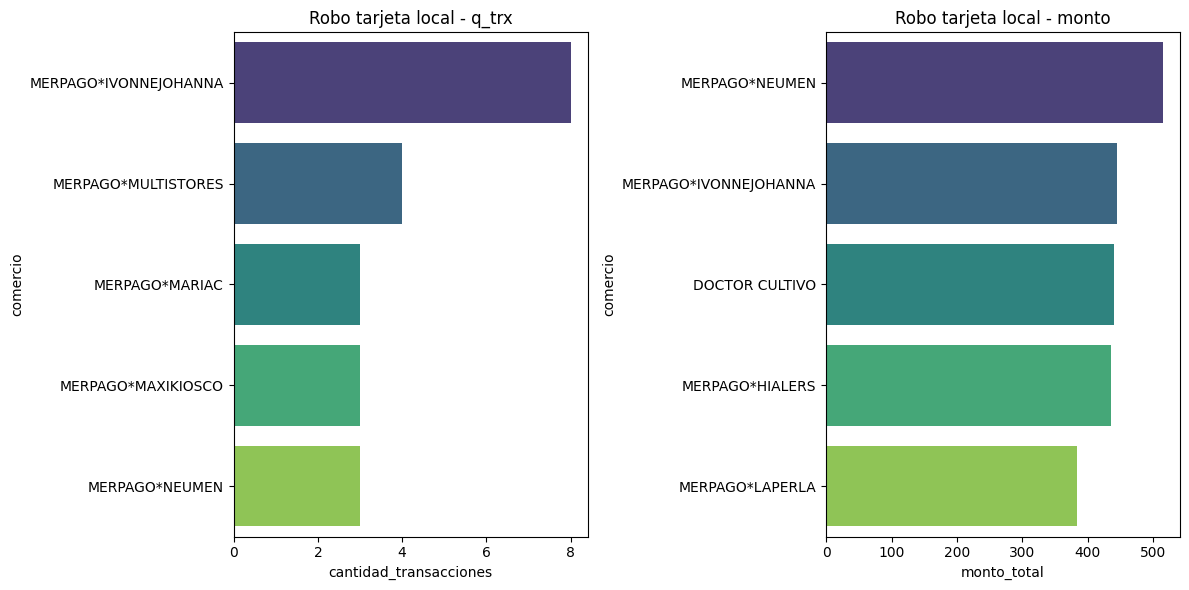

Correlación entre cantidad de transacciones y monto total: 0.4046658161767055


<ipython-input-70-de0401b6bb46>:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_comercios_q, x='cantidad_transacciones', y='comercio', palette='viridis')
<ipython-input-70-de0401b6bb46>:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_comercios_monto, x='monto_total', y='comercio', palette='viridis')


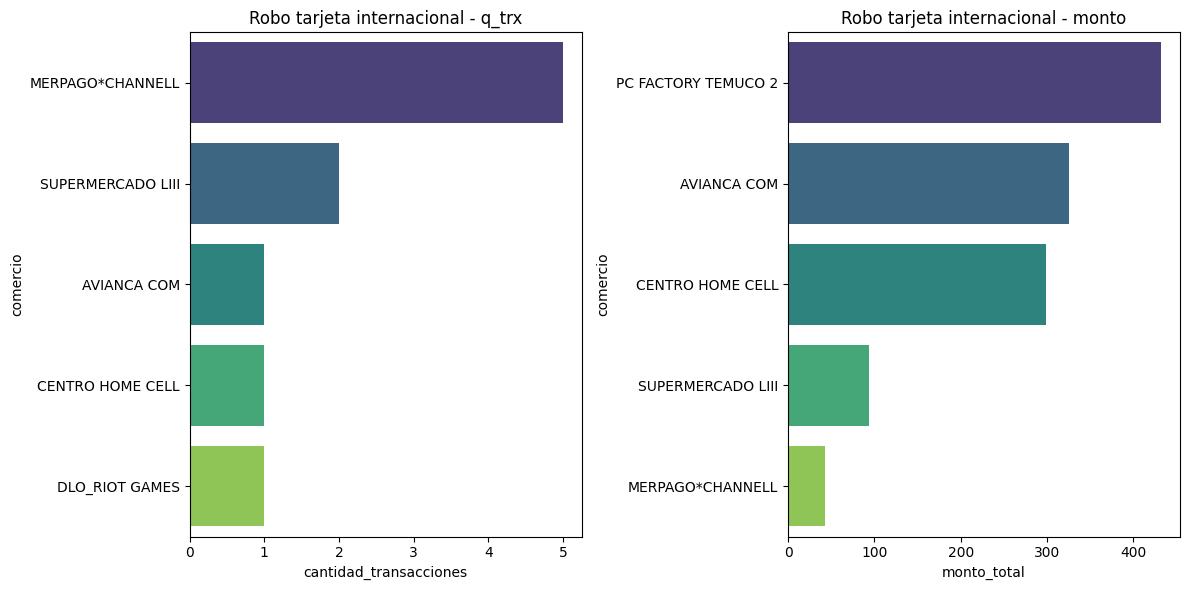

Correlación entre cantidad de transacciones y monto total: -0.3849101539498878


In [70]:
#se prueban nuevas combinaciones


#Tarjeta no presente local
cnp_local = df[
    (df['tipo_fraude'].isin(['CNP'])) &
    (df['ubicacion'].isin(['LOCAL']))
]

comercios_cnp_local = cnp_local.groupby('comercio').agg(
    cantidad_transacciones=('comercio', 'count'),
    monto_total=('monto_usd', 'sum')
).reset_index()


top_5_comercios_q = comercios_cnp_local.nlargest(5, 'cantidad_transacciones')

top_5_comercios_monto = comercios_cnp_local.nlargest(5, 'monto_total')


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(data=top_5_comercios_q, x='cantidad_transacciones', y='comercio', palette='viridis')
plt.title('Tarjeta no presente local - q_trx')


plt.subplot(1, 2, 2)
sns.barplot(data=top_5_comercios_monto, x='monto_total', y='comercio', palette='viridis')
plt.title('Tarjeta no presente local - monto')

plt.tight_layout()

plt.savefig('grafico_1.png', dpi=300, bbox_inches='tight')
plt.show()


correlacion1 = comercios_cnp_local['cantidad_transacciones'].corr(comercios_cnp_local['monto_total'])
print(f'Correlación entre cantidad de transacciones y monto total: {correlacion1}')






#Tarjeta no presente internacional

cnp_inter = df[
    (df['tipo_fraude'].isin(['CNP'])) &
    (df['ubicacion'].isin([ 'INTER']))
]

comercios_cnp_inter = cnp_inter.groupby('comercio').agg(
    cantidad_transacciones=('comercio', 'count'),
    monto_total=('monto_usd', 'sum')
).reset_index()


top_5_comercios_q = comercios_cnp_inter.nlargest(5, 'cantidad_transacciones')

top_5_comercios_monto = comercios_cnp_inter.nlargest(5, 'monto_total')


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(data=top_5_comercios_q, x='cantidad_transacciones', y='comercio', palette='viridis')
plt.title('Tarjeta no presente internacional - q_trx')


plt.subplot(1, 2, 2)
sns.barplot(data=top_5_comercios_monto, x='monto_total', y='comercio', palette='viridis')
plt.title('Tarjeta no presente internacional - monto')

plt.tight_layout()


plt.savefig('grafico_2.png', dpi=300, bbox_inches='tight')
plt.show()



correlacion2 = comercios_cnp_inter['cantidad_transacciones'].corr(comercios_cnp_inter['monto_total'])
print(f'Correlación entre cantidad de transacciones y monto total: {correlacion2}')


#Robo tarjeta local

robo_local = df[
    (df['tipo_fraude'].isin(['ROBO'])) &
    (df['ubicacion'].isin(['LOCAL']))
]


comercios_robo_local = robo_local.groupby('comercio').agg(
    cantidad_transacciones=('comercio', 'count'),
    monto_total=('monto_usd', 'sum')
).reset_index()


top_5_comercios_q = comercios_robo_local.nlargest(5, 'cantidad_transacciones')

top_5_comercios_monto = comercios_robo_local.nlargest(5, 'monto_total')


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(data=top_5_comercios_q, x='cantidad_transacciones', y='comercio', palette='viridis')
plt.title('Robo tarjeta local - q_trx')


plt.subplot(1, 2, 2)
sns.barplot(data=top_5_comercios_monto, x='monto_total', y='comercio', palette='viridis')
plt.title('Robo tarjeta local - monto')

plt.tight_layout()


plt.savefig('grafico_3.png', dpi=300, bbox_inches='tight')
plt.show()




correlacion3 = comercios_robo_local['cantidad_transacciones'].corr(comercios_robo_local['monto_total'])
print(f'Correlación entre cantidad de transacciones y monto total: {correlacion3}')



#Robo tarjeta internacional

robo_inter = df[
    (df['tipo_fraude'].isin(['ROBO'])) &
    (df['ubicacion'].isin([ 'INTER']))
]


comercios_robo_inter = robo_inter.groupby('comercio').agg(
    cantidad_transacciones=('comercio', 'count'),
    monto_total=('monto_usd', 'sum')
).reset_index()


top_5_comercios_q = comercios_robo_inter.nlargest(5, 'cantidad_transacciones')

top_5_comercios_monto = comercios_robo_inter.nlargest(5, 'monto_total')


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(data=top_5_comercios_q, x='cantidad_transacciones', y='comercio', palette='viridis')
plt.title('Robo tarjeta internacional - q_trx')


plt.subplot(1, 2, 2)
sns.barplot(data=top_5_comercios_monto, x='monto_total', y='comercio', palette='viridis')
plt.title('Robo tarjeta internacional - monto')

plt.tight_layout()


plt.savefig('grafico_4.png', dpi=300, bbox_inches='tight')
plt.show()


correlacion4 = comercios_robo_inter['cantidad_transacciones'].corr(comercios_robo_inter['monto_total'])
print(f'Correlación entre cantidad de transacciones y monto total: {correlacion4}')




Se observa, únicamente, disminución en el porcentaje de correlación en las transacciones con tarjeta no presente con pagos internacionales. Aunque la correlación general no es alta, siendo en torno al 40%, el segmento mencionado se reduce bastante. Se supone que esto se debe al tipo de cambio de moneda, junto a las normativas de seguridad que impactan a pagos internacionales.